#**Overview**

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
from wordcloud import WordCloud

In [3]:
emails = pd.read_csv('./enron.csv', skiprows=lambda x:x%2)
cols = emails.columns
emails.head(3)

,file,message
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...


In [4]:
import email
message = emails.loc[0]["message"]
e = email.message_from_string(message)
e.items()


[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [5]:
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [6]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [7]:
emails["date"] = get_field("Date", emails["message"])
emails["subject"] = get_field("Subject", emails["message"])
emails["X-Folder"] = get_field("X-Folder", emails["message"])
emails["X-From"] = get_field("X-From", emails["message"])
emails["X-To"] = get_field("X-To", emails["message"])
emails.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper


In [8]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

emails["body"] = body(emails["message"])
emails.head(3)

#EDA

## Distribution of message length

In [1]:
emails['Message Length'] = emails['body'].apply(lambda x: len(x))

sns.distplot(emails['Message Length'],bins=None,hist=False)

NameError: name 'emails' is not defined

**Observations**

*   The message length distribution is right skewed




**Observation**

*   The maximum message length is more than 2 million




## CDF of message length

Text(0.5, 1.0, 'CDF of message length')

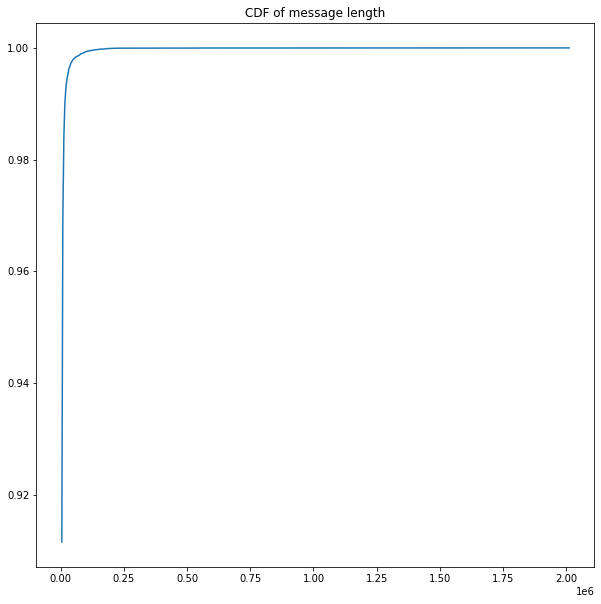

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
counts, bin_edges = np.histogram(emails['Message Length'], bins=500, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of message length')

**Observations**

*   99% messages have length below 500000




## Top 10 Employee with most mails sent

In [ ]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

emails["employee"] = employee(emails["file"])
emails.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,"Greg,\n\n How about either next Tuesday or Thu...",allen-p


In [ ]:
top_10 = pd.DataFrame(emails["employee"].value_counts()[:10])
top_10.reset_index(inplace=True)
top_10.columns = ["employee_name", "count"]
top_10

,employee_name,count
0,kaminski-v,14233
1,dasovich-j,14117
2,kean-s,12675
3,mann-k,11691
4,jones-t,9975
5,shackleton-s,9344
6,taylor-m,6938
7,farmer-d,6516
8,germany-c,6218
9,beck-s,5915


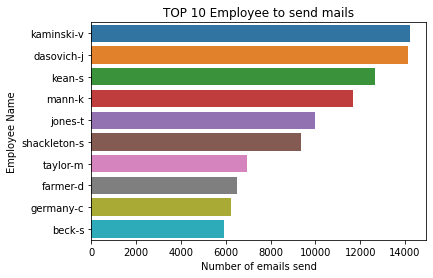

In [ ]:
sns.barplot(y="employee_name", x="count", data=top_10)
plt.xlabel("Number of emails send")
plt.ylabel("Employee Name")
plt.title('TOP 10 Employee to send mails')
plt.show();

**Observation**

*   The Top 10 emails senders sent 6000 to 14000 mails 



## WordCloud for Message body

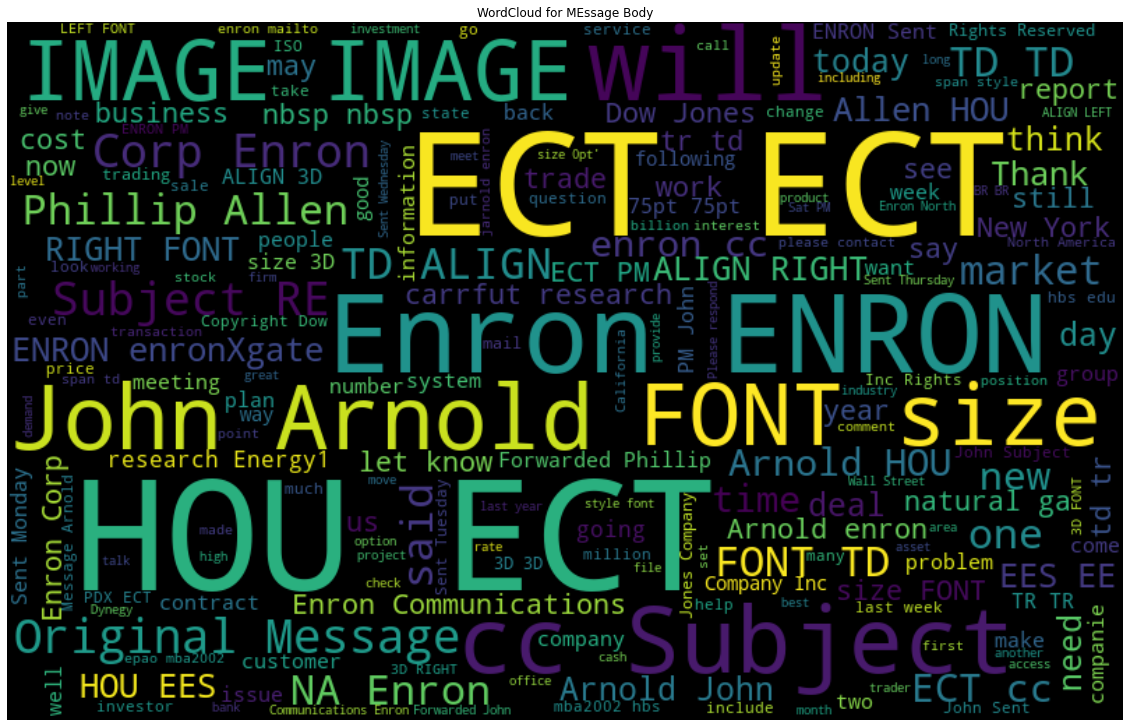

In [8]:
txt=emails['body'][:5000].values.astype(str)
txt_string=''

for i in txt:
  txt_string+= str(i)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(txt_string)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('WordCloud for MEssage Body')
plt.show()

The word cloud depicts the most common words used in the mail body